Relative Return: 54 %
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


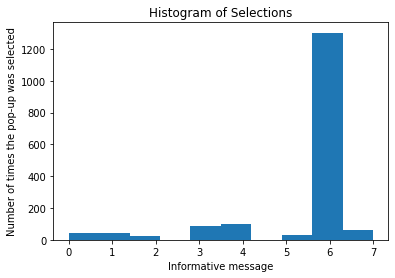

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import random

# Setting the parameters
N = 1692
d = 8

# Building the environment inside a simulation
conversion_rates = [0.05,0.13,0.09,0.16,0.11,0.04,0.20,0.08,0.01]
X = np.array(np.zeros([N,d]))
for i in range(N):
    for j in range(d):
        if np.random.rand() <= conversion_rates[j]:
            X[i,j] = 1

# Implementing Random Selection and Thompson Sampling
strategies_selected_rs = []
strategies_selected_ts = []
total_reward_rs = 0
total_reward_ts = 0
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
for n in range(0, N):
    # Random Selection
    strategy_rs = random.randrange(d)
    strategies_selected_rs.append(strategy_rs)
    reward_rs = X[n, strategy_rs]
    total_reward_rs = total_reward_rs + reward_rs
    # Thompson Sampling
    strategy_ts = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            strategy_ts = i
    reward_ts = X[n, strategy_ts]
    if reward_ts == 1:
        numbers_of_rewards_1[strategy_ts] = numbers_of_rewards_1[strategy_ts] + 1
    else:
        numbers_of_rewards_0[strategy_ts] = numbers_of_rewards_0[strategy_ts] + 1
    strategies_selected_ts.append(strategy_ts)
    total_reward_ts = total_reward_ts + reward_ts

# Computing the Relative Return
relative_return = (total_reward_ts - total_reward_rs) / total_reward_rs * 100
print("Relative Return: {:.0f} %".format(relative_return))

# Plotting the Histogram of Selections
plt.hist(strategies_selected_ts)
plt.title('Histogram of Selections')
plt.xlabel('Informative message')
plt.ylabel('Number of times the pop-up was selected')
print(X)
plt.show()

In [3]:
import pandas as pd
df = pd.DataFrame(X)

In [4]:
df

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1687,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1689,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.to_csv(r'Matrix_of_clicks.csv', header=None, index=None, sep=' ', mode='a')

In [28]:
sum(df[0])+sum(df[1])+sum(df[2])+sum(df[3])+sum(df[4])+sum(df[5])+sum(df[6])+sum(df[7])

1481.0

In [39]:
df_column = []
for i in df:
    element = sum(df[0])
    df_column.append(element)

In [42]:
i in df

True